# A neural network written on numpy using only math
1. An example copied from Samson Zhang
2. An experiment with a different activation function

## 1. ReLU, softmax based 3-layer NN

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [27]:
data.head()
data.shape

(42000, 785)

In [42]:
data_matrix = np.array(data)
m,n = data_matrix.shape
np.random.shuffle(data_matrix)

data_dev = data_matrix[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data_matrix[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [35]:
X_train[:, 0].shape

(784,)

In [61]:
def init_params():
    '''
    Initializing the weights and biases randomly
    '''
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def ReLU(Z):
    '''
    Activation function for the first layer - Rectified Linear Unit
    '''
    return np.maximum(0, Z)

def deriv_ReLU(Z):
    '''
    Function that counts the derivative of the ReLU function
    '''
    return Z > 0

def softmax(Z):
    '''
    Activation function for the second layer - softmax that represents the result of Z2 as probabilities (b/w 0 and 1)
    '''
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def frwd_prop(w1, b1, w2, b2, X):
    '''
    Forward propogation:
    1) multiplying weights1 and the input matrix, adding bias1
    2) activation function ReLU -> A1
    3) multiplying weights2 and the A1, adding bias2
    4) activation function softmax -> A2
    '''
    Z1 = w1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    '''
    Representing the Labels in binary where the correct number is 1 and others are 0
    '''
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def back_prop(Z1, A1, Z2, A2, w1, w2, X, Y):
    '''
    Back propogation - too long to explain
    '''
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y 
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = w2.T.dot(dZ2) * deriv_ReLU(Z1)
    dw1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    '''
    Changin the weights and the biases
    '''
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [44]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_precision(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = frwd_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = back_prop(Z1, A1, Z2, A2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_precision(get_predictions(A2), Y))
        
    return w1, b1, w2, b2

In [46]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[0 8 8 ... 3 0 6] [3 8 2 ... 7 5 0]
Accuracy:  0.13863414634146343
Iteration:  50
[5 8 0 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.5106829268292683
Iteration:  100
[5 8 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.6786341463414635
Iteration:  150
[3 8 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.7453414634146341
Iteration:  200
[3 8 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.780829268292683
Iteration:  250
[3 8 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.8043658536585366
Iteration:  300
[3 4 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.819780487804878
Iteration:  350
[3 4 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.8310731707317073
Iteration:  400
[3 4 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.8400975609756097
Iteration:  450
[3 4 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.846390243902439


In [52]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, A2 = frwd_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = "nearest")
    plt.show()

Prediction:  2
Label:  2


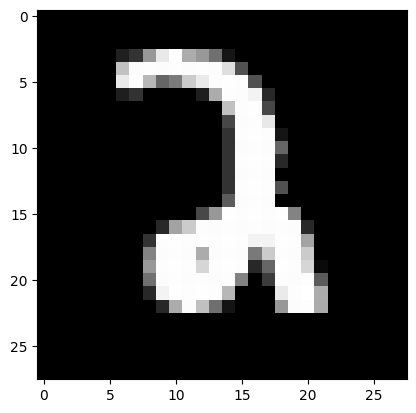

Prediction:  5
Label:  5


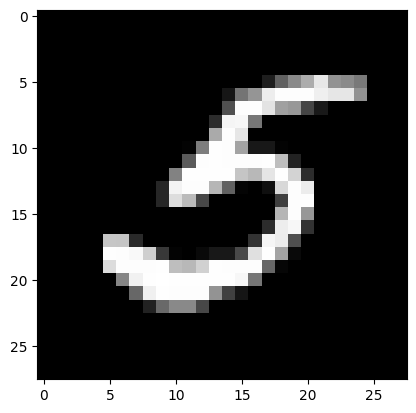

Prediction:  7
Label:  7


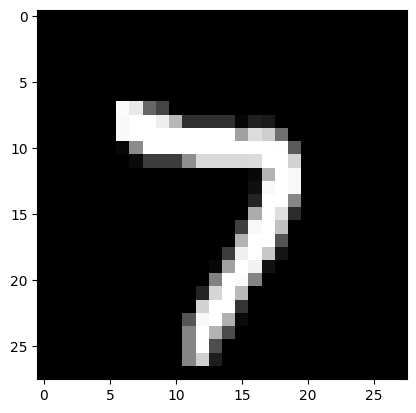

Prediction:  9
Label:  9


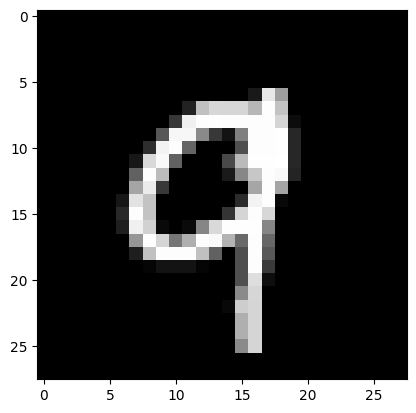

In [55]:
test_prediction(101, w1, b1, w2, b2)
test_prediction(102, w1, b1, w2, b2)
test_prediction(103, w1, b1, w2, b2)
test_prediction(104, w1, b1, w2, b2)

In [56]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 2 4 3 4 4 2 9 9 3 1 7 5 6 7 8 1 9 5 8 9 6 0 3 1 8 0 4 1 3 5 5 6 0 0 1 2
 4 5 1 1 2 4 4 7 2 2 8 8 7 1 5 2 1 8 9 1 1 1 3 1 3 7 3 9 7 4 9 6 0 5 8 8 9
 7 5 0 4 7 9 4 4 4 3 2 0 3 5 7 3 7 8 4 9 9 6 0 2 0 7 1 9 9 0 1 9 3 0 5 1 1
 1 1 9 8 6 6 8 7 8 1 8 1 2 8 2 5 8 8 0 0 8 8 9 2 2 6 4 4 8 9 7 7 4 1 1 9 5
 8 3 8 1 0 9 5 3 6 2 0 5 7 4 2 5 9 4 9 4 8 6 1 3 6 1 2 0 9 6 1 1 8 7 0 4 0
 4 6 4 4 8 3 6 7 3 5 1 0 1 1 0 8 5 8 7 1 6 3 7 7 1 5 9 2 2 7 4 1 8 2 0 6 4
 3 4 1 9 4 0 8 7 5 9 3 8 8 3 1 1 7 1 3 0 7 6 7 8 8 8 7 5 8 3 2 6 7 7 9 6 9
 0 4 3 3 0 0 9 8 2 6 7 8 8 4 1 1 4 0 3 5 5 0 4 5 1 2 1 7 6 9 7 7 0 2 5 1 4
 7 1 7 7 8 4 3 6 6 3 3 5 7 5 2 0 9 2 4 1 5 3 6 0 4 8 1 9 8 0 4 1 9 3 7 0 2
 1 2 1 7 1 7 1 0 9 2 4 6 5 4 7 8 5 1 7 0 7 0 7 1 9 6 6 3 7 1 9 5 3 0 9 7 0
 9 9 3 3 7 1 4 8 9 9 2 4 4 1 0 6 2 3 1 9 5 3 6 2 4 3 9 8 9 6 9 8 9 3 6 2 5
 6 0 0 1 5 5 5 1 8 1 0 6 9 6 8 3 6 3 6 2 9 5 9 4 1 3 7 9 2 7 4 3 4 3 0 3 0
 1 3 6 1 1 9 3 2 4 4 5 3 1 1 8 3 7 2 6 0 1 1 5 2 7 7 6 9 1 4 9 4 5 8 9 3 0
 9 3 4 8 0 0 9 8 1 4 9 8 

0.858

## 2. tanh, softmax based 3 layer NN

In [63]:
'''
Alt activattion function
'''

def tanh_activation(Z):
    return np.tanh(Z)

def deriv_tanh(Z):
    return 1 / np.power(np.cosh(Z), 2)

In [66]:
'''
Alt NN - using tanh
'''

def frwd_prop_tanh(w1, b1, w2, b2, X):
    '''
    Forward propogation:
    1) multiplying weights1 and the input matrix, adding bias1
    2) activation function tanh -> A1
    3) multiplying weights2 and the A1, adding bias2
    4) activation function softmax -> A2
    '''
    Z1 = w1.dot(X) + b1
    A1 = tanh_activation(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

    
def back_prop_tanh(Z1, A1, Z2, A2, w1, w2, X, Y):
    '''
    Back propogation - too long to explain
    '''
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y 
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = w2.T.dot(dZ2) * deriv_tanh(Z1)
    dw1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dw1, db1, dw2, db2

In [67]:
def gradient_descent_tanh(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = frwd_prop_tanh(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = back_prop_tanh(Z1, A1, Z2, A2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_precision(get_predictions(A2), Y))
        
    return w1, b1, w2, b2

In [69]:
tanh_w1, tanh_b1, tanh_w2, tanh_b2 = gradient_descent_tanh(X_train, Y_train, 500, 0.1)

Iteration:  0
[2 2 3 ... 7 1 4] [3 8 2 ... 7 5 0]
Accuracy:  0.12563414634146342
Iteration:  50
[3 3 0 ... 3 1 0] [3 8 2 ... 7 5 0]
Accuracy:  0.4472439024390244
Iteration:  100
[3 9 6 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.5934878048780488
Iteration:  150
[3 9 6 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.6618536585365854
Iteration:  200
[3 9 6 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.7068536585365853
Iteration:  250
[3 9 6 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.7422682926829268
Iteration:  300
[3 4 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.7672439024390244
Iteration:  350
[3 4 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.7853170731707317
Iteration:  400
[3 4 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.799
Iteration:  450
[3 8 2 ... 7 5 0] [3 8 2 ... 7 5 0]
Accuracy:  0.8100975609756098


In [70]:
def make_predictions_tanh(X, w1, b1, w2, b2):
    _, _, _, A2 = frwd_prop_tanh(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction_tanh(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions_tanh(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = "nearest")
    plt.show()

Prediction:  2
Label:  2


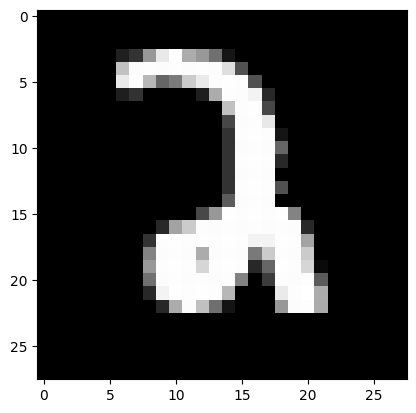

Prediction:  3
Label:  5


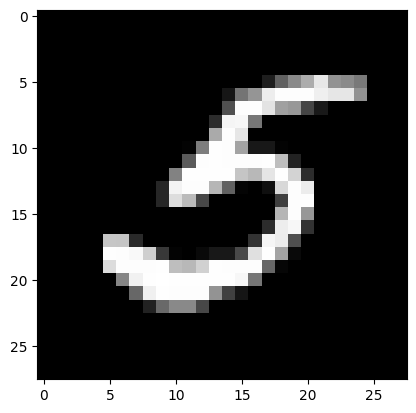

Prediction:  7
Label:  7


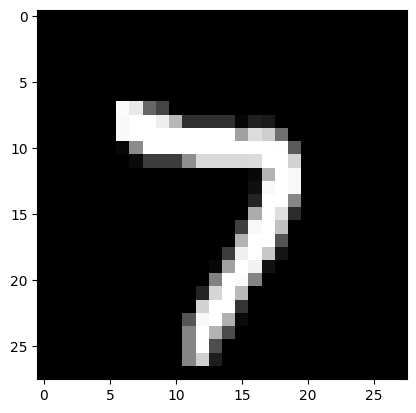

Prediction:  9
Label:  9


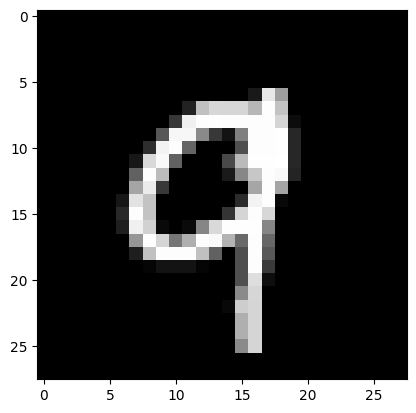

In [71]:
test_prediction(101, w1, b1, w2, b2)
test_prediction(102, w1, b1, w2, b2)
test_prediction(103, w1, b1, w2, b2)
test_prediction(104, w1, b1, w2, b2)